# Analysis Report VII

In [63]:
import pandas as pd

data = pd.read_csv('data/residential_realties.csv', sep=';')
data.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [64]:
data['Valor'].mean()

5046.172821405663

In [65]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selection = data['Bairro'].isin(bairros)
data = data[selection]
data['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [66]:
group_bairro = data.groupby('Bairro')
type(group_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [67]:
# group_bairro.groups

In [68]:
for bairro, d in group_bairro:
    print(f'Average value to {bairro}: {d.Valor.mean()}')

Average value to Barra da Tijuca: 7069.552938130986
Average value to Botafogo: 8791.828178694159
Average value to Copacabana: 4126.677004538578
Average value to Flamengo: 4113.526610644258
Average value to Ipanema: 9352.001133786847
Average value to Leblon: 8746.344992050874
Average value to Tijuca: 2043.52


In [69]:
group_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

## Descriptive Statistics

In [70]:
group_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [71]:
group_bairro['Valor'].aggregate(
    ['min', 'max', 'sum'],
).rename(
    columns={
        'min': 'Minimum',
        'max': 'Maximum',
        'sum': 'Sum',
    },
)

,Minimum,Maximum,Sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


### Using matplolib to visualize possibly wrong data

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('figure', figsize=(20, 10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

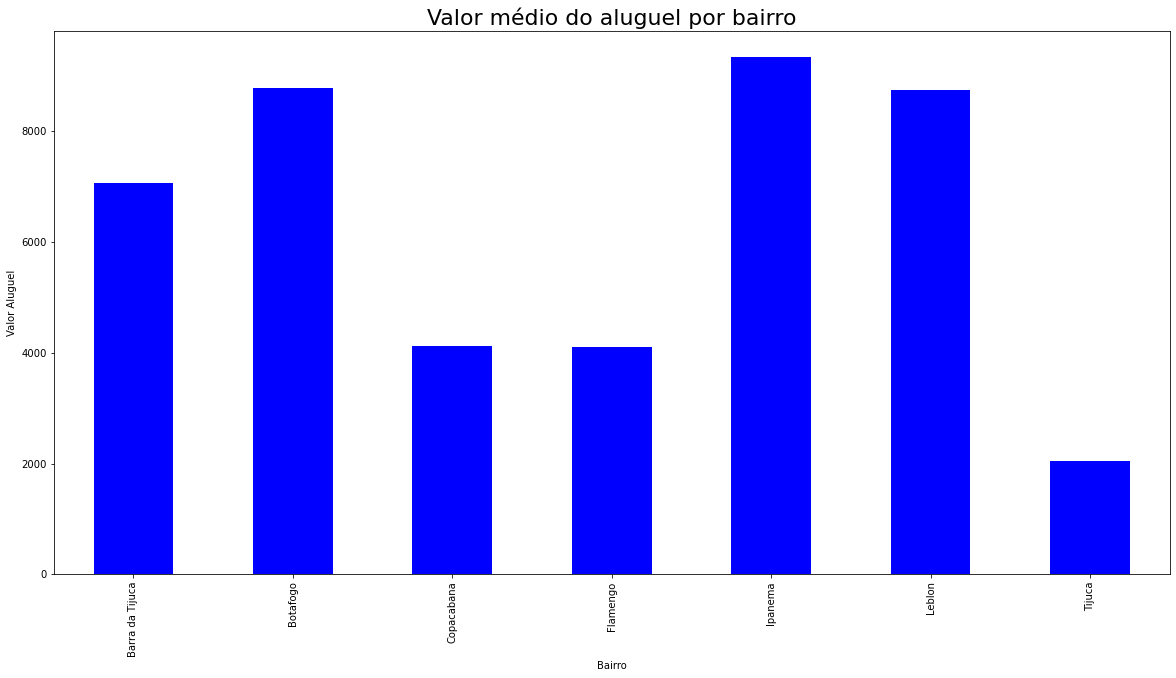

In [73]:
fig = group_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

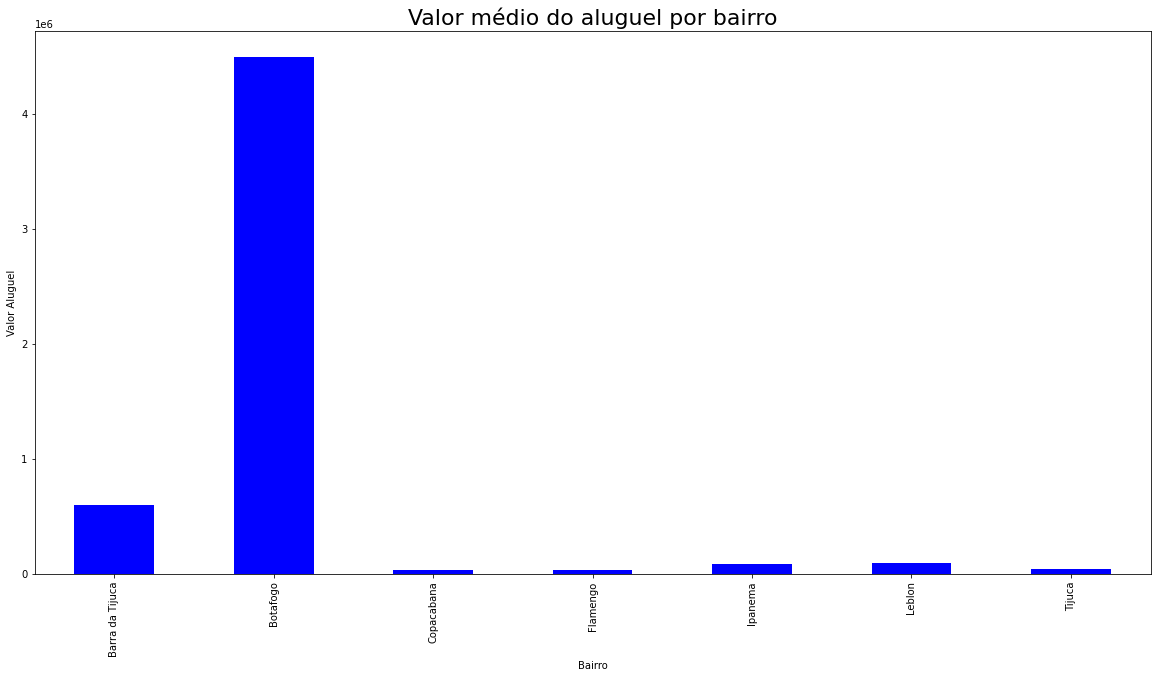

In [75]:
fig = group_bairro['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})